# Fuzzy Logic and Fuzzy Set

This exercise introduce the basic ideas of fuzzy sets.

## A. Crisp Sets and Logic

Classical logic is based on the crisp set, where a group of distinct objects are considered as a collection. For example, a collection or a crisp set of color white and red can be defined as:

$$\text{F}=\{\text{red}, \text{white}\} \;\;\;\; \text{(1)}$$

A crisp subset can be defined from a more extensive set where the elements of the set belong to the subset according to some condition. For example, set A can be defined as the set of numbers that are greater or equal to 4 and smaller or equal to 12:

$$\text{A}=\{i | i \text{ is an integer and } 4 \leq i \leq 12\} \;\;\;\; \text{(2)}$$

The graphical representation of the subset above can be possible if an indicator function of this set can be introduced. In the case (2), the indicator function can be defined as the following:

$$
\mathbb{1}_{A}(x)=
\begin{cases}
1 \;\;\;\;  \text{if } 4 \leq x \leq 12 \\
0, \;\;\;\; \text{otherwise}
\end{cases}
\;\;\;\; \text{(3)}
$$

The indicator function is also called membership function that determine which elements belong to the set.

Demo code

In [105]:
# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np

In [106]:
# Create an array of integers in range [0, 20]
X = np.arange(0, 21)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [107]:
# Define the indicator function of Eq. (2) with values of X
indA = np.array([1 if (4 <= x <= 12) else 0 for x in X])
indA

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

The plot of Indicator function of A

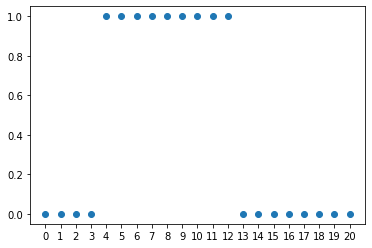

In [108]:
# Plot the indicator function of Eq. (3) with values of X
plt.scatter(X, indA)
plt.xticks(X)
plt.show()

Similar, define the indicator function of set: $B=\{i|i \text{ is integer and } 10 \leq i \leq 15 \}$:

$$
\mathbb{1}_{B}(x)=
\begin{cases}
1 \;\;\;\;  \text{if } 10 \leq x \leq 15 \\
0, \;\;\;\; \text{otherwise}
\end{cases}
\;\;\;\; \text{(4)}
$$

In [109]:
# TODO:
# Define the indicator function as Eq. (4) with values of X
indB = np.array([1 if (10 <= x <= 15) else 0 for x in X])
# Start your code in the below of this line


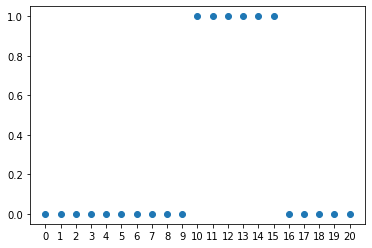

In [110]:
# TODO:
# Plot the indicator function of Eq. (3) with values of X
# Start your code in the below of this line
plt.scatter(X, indB)
plt.xticks(X)
plt.show()


The operators of crisp sets include:

1. The **Intersection** ($\cap$) of two sets is the set that containing all elements that are common to both sets.
2. The **Union** ($\cup$) of two sets is the set that containing all elements that are in either of the sets.
3. The **completion** ($\neg$) of a set A is the set containing all elements that not in A.

Using the example of set A and B, the indicator functions of **Indication**, **Union** and **Negation**. Your task is to define the indicator functions of $A \cap B$, $A \cup B$ and $\neg A$ and then write the code to plot the indicator result with value of X.

In [111]:
# TODO:
# Write the indicator function of intersection, union, negation operators of set A and B with values of X,
# then plot them
def Intersect(A,B):
    temparray=A.copy()
    i=0
    while i<len(temparray):
          temparray[i]=1 if (temparray[i]==1 or B[i]==1) else 0
          i=i+1
    return temparray      
           


# Indicator function of intersection of A and B
ind_A_intersect_B = Intersect(indA,indB)
# Start the code here


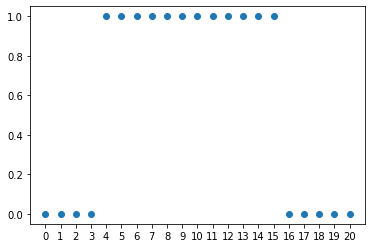

In [112]:
# TODO: Plot the indicator function of intersection of A and B with values of X
# Start the code here
plt.scatter(X, ind_A_intersect_B)
plt.xticks(X)
plt.show()

In [113]:
# TODO: Indicator function of union of A and B
def Union(A,B):
    temparray=A.copy()
    i=0
    while i<len(temparray):
          if temparray[i]==1 and B[i]==1:
              temparray[i]=1
          else:
              temparray[i]=0    
          i=i+1
    return temparray     

ind_A_union_B =Union(indA,indB)
# Start the code here


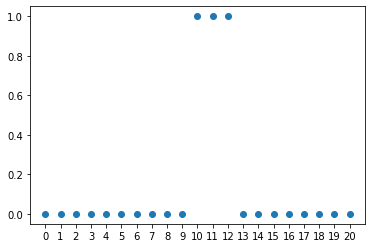

In [114]:
# TODO: Plot the indicator function of union of A and B with values of X
# Start the code here
plt.scatter(X, ind_A_union_B)
plt.xticks(X)
plt.show()

In [115]:
# TODO: Indicator function of negation of A
def Negation(A,B):
    temparray=A.copy()
    i=0
    while i<len(temparray):
           temparray[i]=0 if temparray[i]==1 else 1   
           i=i+1
    return temparray     


ind_not_A = Negation(indA,indB)
# Start the code here


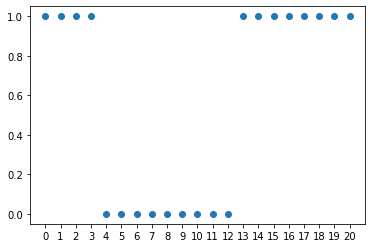

In [116]:
# TODO: Plot the indicator function of negation of A with values of X
# Start the code here
plt.scatter(X, ind_not_A)
plt.xticks(X)
plt.show()


## B. Fuzzy Sets

Unlike crisp sets, a fuzzy set allows partial belonging to a set, that is defined by a **degree of membership**, denoted by $\mu$, that can take any value from 0 (element does not belong at all in the set) to 1 (element belongs fully to the set).

The **membership function** of the set is the relationship between the elements of the set and their degree-of-belonging. An illustration of how membership functions can be applied to temperature is shown below:

![](figures/1*uYhHBMrBgAdzxjJaira1bA.jpeg)

In the example above, the fuzzy sets describe temperatures of an engine ranging from very cold to very hot. The value, µ, is the amount of membership in the set. One can notice, for example, that at a temperature of 80 degrees, the engine can be described as being hot to a factor of 0.8, and very hot to a factor of 0.2.

The union, intersection, and negation operators of fuzzy sets is expressed in different ways:
1. The most common method to compute the **Union** of two fuzzy sets is **maximum** operator on the sets. Another method is the **product** operator on the sets.
2. The most common method to compute the **Intersection** of two fuzzy sets is minimum operator on the sets
3. The **complement (negation)** of a fuzzy set is calculated by **subtracting** the set memebership function from 1.

## C. Implementation Exercise

This exercise will guide you to implement the fuzzy set in Python. The fuzzy set is constructed to Python class, named **FuzzySet**.

A FuzzySet require the following parameters so that it can be initialized:
* *name*&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;the name of set
* *domain_min*&emsp;&ensp;the minimum value of the set
* *domain_max*&emsp;&nbsp;the maximum value of the set
* *res*&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;the number of steps between the minimum and maximum value

Therefore, the FuzzySet is represented by using two numpy arrays; one that hold the domain value and one that will hold the degree-of-membership (dom) values (initialized zeros).

The implementation of the FuzzySet is put in `fuzzy_system/fuzzy_set.py`. Please **complete** the method that having **TODO** in **FuzzySet** class.

To use FuzzySet, you need to implement operator methods of FuzzySet class. Denote fuzzy set is A, and the membership function is $\mu_{A}$

**`complement`** method: It is calculated by subtract the degree of membership value from 1.

$$\mu_{\bar{A}}(x)=1-\mu_{A}(x), \forall x \in X \;\;\;\; \text{(5)}$$

**`intersection`** method: Denote another fuzzy set is A, and the membership function of B is $\mu_{B}$. It is calculated by minimum of the degree of membership value of A and B.

$$\mu_{A \cap B}=\min{(\mu_{A}, \mu_{B})}, \forall x \in X \;\;\;\; \text{(6)}$$

**`union`** method: It is calculated by maximum of the degree of membership value of A and B.

$$\mu_{A \cup B}=\max{(\mu_{A}, \mu_{B})}, \forall x \in X \;\;\;\; \text{(7)}$$

![](figures/Fuzzy-sets-operations-adapted-from-Negnevitsky-2002-Chap-4.png)



`trapezoidal` method: membership function defined by a lower limit $a$, an upper limit $d$, a lower support limit $b$, and an upper support limit $c$, where $a < b < c < d$.

$$
\mu_{A}(x)=
\begin{cases}
0, \;\;\;\;\;\;\;\;\;\;\;\; (x < a ) \text{ or } (x > d) \\
\frac{x - a}{b - a}, \;\;\;\; a \leq x \leq b \\
1, \;\;\;\;\;\;\;\;\;\;\;\; b \leq x \leq c \\
\frac{d - x}{d - c}, \;\;\;\; c \leq x \leq d \\
\end{cases}
\;\;\;\; \text{(8)}
$$

![](figures/funtri.jpg)

`trianglular` method: membership function defined by a lower limit $a$, an upper limit $b$, and a value $m$, where $a < m < b$.

$$
\mu_{A}(x)=
\begin{cases}
0, \;\;\;\;\;\;\;\;\;\;\;\; x \leq a \\
\frac{x - a}{m - a}, \;\;\;\; a < x \leq m \\
\frac{b - x}{b - m}, \;\;\;\; m < x < b \\
0, \;\;\;\;\;\;\;\;\;\;\;\; x \geq b \\
\end{cases}
\;\;\;\; \text{(9)}
$$

![](figures/funtrap.jpg)

`defuzzify_cog` method: The method that transfer fuzzy set to crisp set using center-of-gravity technique.

$$x^{'}=\frac{\sum_{i}{\mu_{A}(x_{i})}}{\sum_{i}\mu_{A}(x_{i})}\;\;\;\; \text{(10)}$$

After finishing the **required implementation**, try the demo code in below section. The result should be similar as following:

![](figures/s.png)

![](figures/t.png)

![](figures/s_t.png)

In [117]:
from fuzzy_system import FuzzySet

ValueError: x, y, and format string must not be None

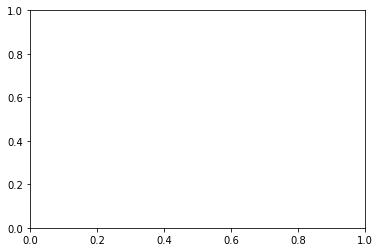

In [118]:
# Define the fuzzy set with trapezoidal membership function
s = FuzzySet.create_trapezoidal(name='S', domain_min=1, domain_max=100, res=100, a=20, b=30, c=50, d=80)

fig, axs = plt.subplots(1, 1)
s.plot_set(axs)
plt.show()

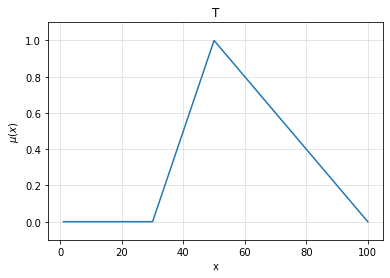

In [ ]:
t = FuzzySet.create_triangular('T', 1, 100, 100, 30, 50, 100)

fig, axs = plt.subplots(1, 1)
t.plot_set(axs)
plt.show()

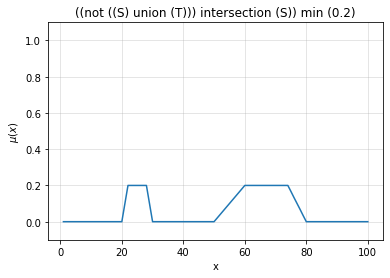

In [ ]:
# Do some operation and plot the result fuzzy set
fig, axs = plt.subplots(1, 1)
s.union(t).complement().intersection(s).min_scalar(0.2).plot_set(axs)
plt.show()